# **Lab: Neural Networks for Music Classification**

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Import Librosa for audio feature extraction

In [6]:
import librosa
import librosa.display
import librosa.feature

In [7]:
import requests
fn = "SopSax.Vib.pp.C6Eb6.aiff"
url = "http://theremin.music.uiowa.edu/sound files/MIS/Woodwinds/sopranosaxophone/"+fn
r = requests.get(url, allow_redirects=True)

open(fn, 'wb').write(r.content)

y, sr = librosa.load(fn)

Displaying Mel Frequency Spectrogram 

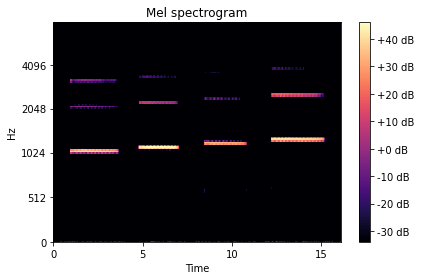

In [8]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.amplitude_to_db(S),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

Loading the data

In [9]:
from google.colab import drive

drive.mount("/content/gdrive")
!gunzip -c "./gdrive/My Drive/Datasets/instrument_dataset.tgz"  | tar xf -

Mounted at /content/gdrive


In [10]:
data_dir = 'instrument_dataset/'
Xtr = np.load(data_dir+'uiowa_train_data.npy')
ytr = np.load(data_dir+'uiowa_train_labels.npy')
Xts = np.load(data_dir+'uiowa_test_data.npy')
yts = np.load(data_dir+'uiowa_test_labels.npy')

In [11]:
print("The number of training samples = {} and number of test samples = {}".format(Xtr.shape[0], Xts.shape[0]))
print("The number of features = {}".format(Xtr.shape[1]))
print("The number of classes = {}".format(int(np.max(ytr)+1)))

The number of training samples = 66247 and number of test samples = 14904
The number of features = 120
The number of classes = 10


Scaling the test and training data

In [12]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
Xtr_scale = scal.fit_transform(Xtr)
Xts_scale = scal.transform(Xts)

Building a Neural Network Classifier

In [13]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()

In [14]:
nh = 256
nin = Xtr_scale.shape[1]  
nout = int(np.max(ytr)+1)    
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 256)               30976     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 33,546
Trainable params: 33,546
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(Xtr_scale, ytr, epochs=10, batch_size=100, validation_data=(Xts_scale,yts))

Epoch 1/10
663/663 [==============================] - 2s 3ms/step - loss: 0.3689 - accuracy: 0.9000 - val_loss: 0.1914 - val_accuracy: 0.9448
Epoch 2/10
663/663 [==============================] - 2s 2ms/step - loss: 0.1020 - accuracy: 0.9753 - val_loss: 0.1050 - val_accuracy: 0.9685
Epoch 3/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0602 - accuracy: 0.9855 - val_loss: 0.0623 - val_accuracy: 0.9849
Epoch 4/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0429 - accuracy: 0.9893 - val_loss: 0.0574 - val_accuracy: 0.9849
Epoch 5/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0322 - accuracy: 0.9916 - val_loss: 0.0379 - val_accuracy: 0.9899
Epoch 6/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.0348 - val_accuracy: 0.9906
Epoch 7/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0213 - accuracy: 0.9943 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 

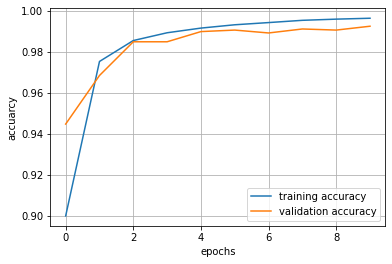

In [18]:
tr_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

Text(18.50828125, 0.5, 'loss')

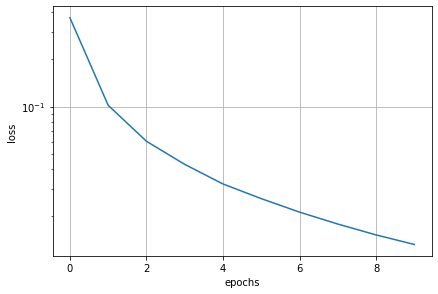

In [19]:
loss = hist.history['loss']

plt.semilogy(loss)
plt.grid()
plt.tight_layout()
plt.xlabel('epochs')
plt.ylabel('loss')

Optimizing the learning rate

In [20]:
rates = [0.01,0.001,0.0001]
batch_size = 100
loss_hist = []
acc_hist = []

for lr in rates:
  
  K.clear_session()

  print("--------------------------For lr={}--------------------------".format(lr))
  opt = optimizers.Adam(lr=lr) 
  
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  hist = model.fit(Xtr_scale, ytr, epochs=20, batch_size=100, validation_data=(Xts_scale,yts))

  loss_hist.append(hist.history['loss'])
  acc_hist.append(hist.history['accuracy'])
  

--------------------------For lr=0.01--------------------------
Epoch 1/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0227 - val_accuracy: 0.9914
Epoch 2/20
663/663 [==============================] - 2s 2ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0488 - val_accuracy: 0.9820
Epoch 3/20
663/663 [==============================] - 2s 2ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 4/20
663/663 [==============================] - 2s 2ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0620 - val_accuracy: 0.9835
Epoch 5/20
663/663 [==============================] - 2s 2ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0380 - val_accuracy: 0.9882
Epoch 6/20
663/663 [==============================] - 2s 2ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0492 - val_accuracy: 0.9873
Epoch 7/20
663/663 [==============================] - 2s 2ms/step - loss: 0.0129 - a

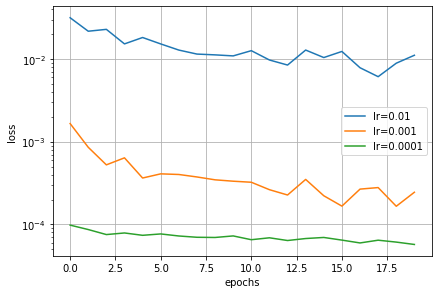

In [21]:
plt.semilogy(loss_hist[0])
plt.semilogy(loss_hist[1])
plt.semilogy(loss_hist[2])
plt.grid()
plt.tight_layout()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['lr=0.01','lr=0.001','lr=0.0001'])